In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

Test Case 1

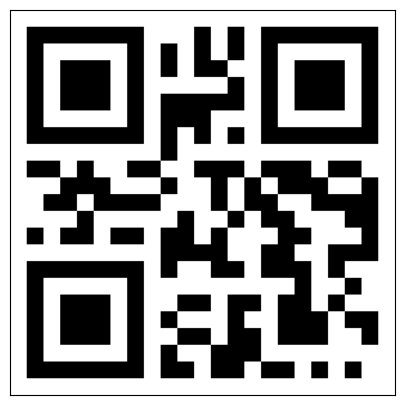

In [14]:
img = cv2.imread("01-Getting-started.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [3]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

44 968 44 968


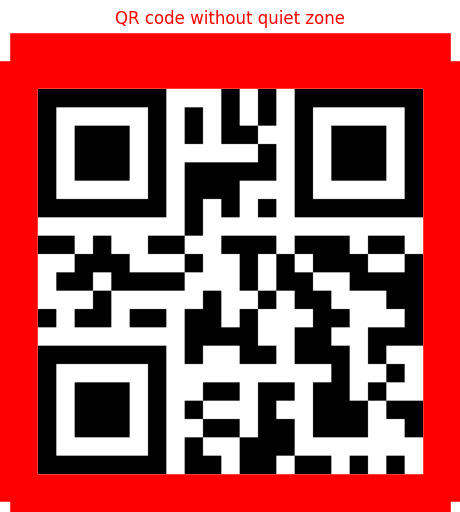

In [4]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 2**

In [5]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

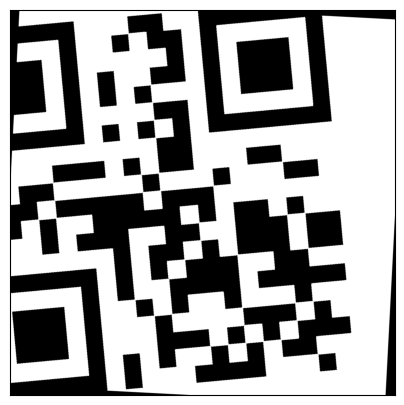

In [6]:
img = cv2.imread("02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img, -3)

kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(dilated_img, cmap='gray');

In [7]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

0 1012 0 1012


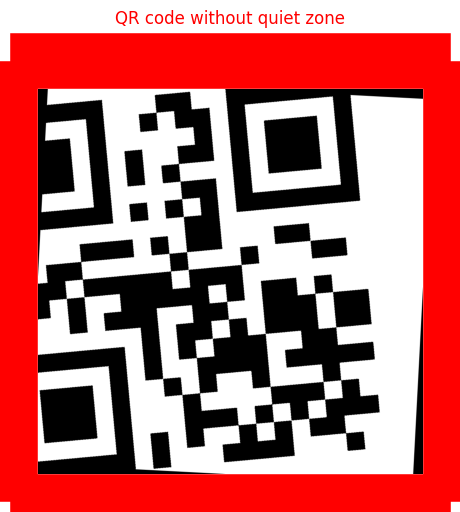

In [8]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 3**

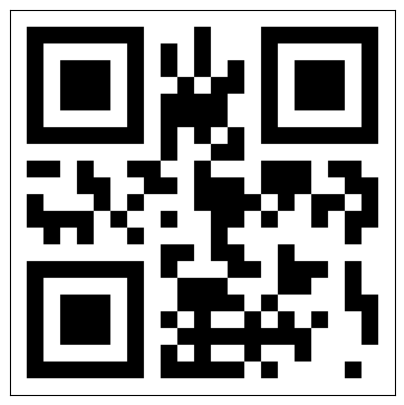

In [9]:
img = cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
img = cv2.rotate(img, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [10]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

44 968 44 968


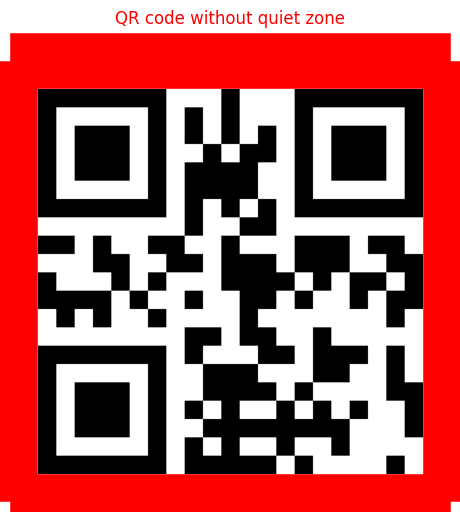

In [11]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 4**

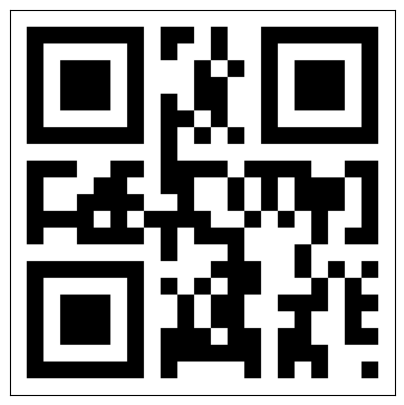

In [12]:
img = cv2.imread("04-Black-mirror.png")
img = 255 - img
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
img = cv2.flip(img, 1)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [13]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

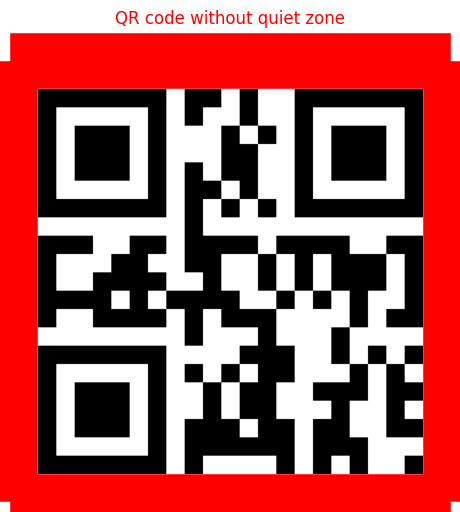

In [ ]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 5**

In [ ]:
def add_quiet_zone(qr_img, border_size = 20):
    height, width = qr_img.shape
    new_img = np.full((height + 2*border_size, width + 2*border_size), 255, dtype=np.uint8)
    new_img[border_size:border_size + height, border_size:border_size + width] = qr_img
    
    return new_img

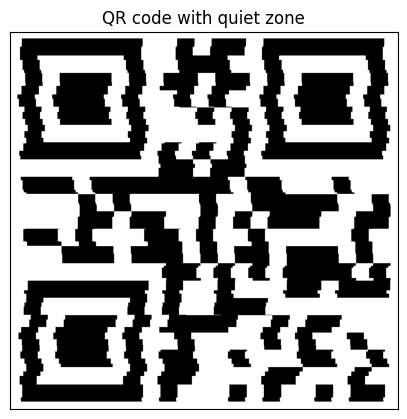

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "05-Caesar-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Adjust the binarization threshold to improve quiet zone detection
_, img_binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Reinitialize the start and end positions for rows and columns
start_row = -1
start_col = -1
end_row = -1
end_col = -1

# Find the first black pixel in each row and column to set boundaries
# Find start row
for row_index in range(img_binary.shape[0]):
    if any(img_binary[row_index] < 255):
        start_row = row_index
        break

# Find end row
for row_index in range(img_binary.shape[0] - 1, -1, -1):
    if any(img_binary[row_index] < 255):
        end_row = row_index + 1
        break

# Find start column
for col_index in range(img_binary.shape[1]):
    if any(img_binary[:, col_index] < 255):
        start_col = col_index
        break

# Find end column
for col_index in range(img_binary.shape[1] - 1, -1, -1):
    if any(img_binary[:, col_index] < 255):
        end_col = col_index + 1
        break

# Check if the boundaries are valid
if (start_row >= 0 and end_row > start_row) and (start_col >= 0 and end_col > start_col):
    # Crop the image using the detected boundaries
    qr_no_quiet_zone = img_binary[start_row:end_row, start_col:end_col]

    qr_with_quiet_zone = add_quiet_zone(qr_no_quiet_zone, 20)

    # Display the QR code without the quiet zone
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("QR code with quiet zone")
    #plt.imshow(qr_no_quiet_zone, cmap="gray")
    plt.imshow(qr_with_quiet_zone, cmap="gray")  # Display the corrected image
else:
    print("Error: Could not find valid boundaries. Please check the image or preprocessing.")

## **Test Case 6**

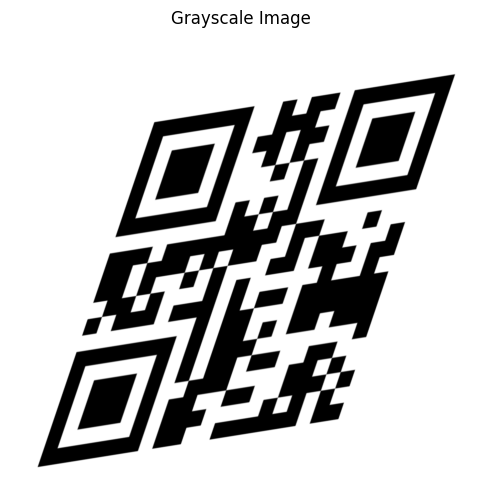

No QR code corners detected, check QR code integrity.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = '06-Railfence-cipher.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plot_image(gray_image, "Grayscale Image")

# Initialize the QRCode detector
detector = cv2.QRCodeDetector()

# Detect the QR code and its corners
data, points, _ = detector.detectAndDecode(gray_image)

if points is not None:
    # Plot points on the image for visual reference
    points = points[0]
    for i in range(4):
        start_point = tuple(points[i % 4].astype(int))
        end_point = tuple(points[(i + 1) % 4].astype(int))
        cv2.line(gray_image, start_point, end_point, (255, 0, 0), 5)

    plot_image(gray_image, 'QR Code with Detected Corners')

    # Calculate the angle to rotate
    angle = -np.degrees(np.arctan2(points[1][1] - points[0][1], points[1][0] - points[0][0]))
    M = cv2.getRotationMatrix2D((gray_image.shape[1]//2, gray_image.shape[0]//2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    plot_image(rotated_image, "Rotated Image")

    # Try to decode again
    decoded_data, decoded_points, _ = detector.detectAndDecode(rotated_image)
    if decoded_data:
        print(f"Decoded Data: {decoded_data}")
    else:
        print("Failed to decode QR code even after rotation.")
else:
    print("No QR code corners detected, check QR code integrity.")


In [16]:
import matplotlib
matplotlib.use('TkAgg')  
import numpy as np
import matplotlib.pyplot as plt

def align_qr_code_quickly(img):
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Select reference points on the QR code:\n1. Bottom-left   2. Bottom-right\n3. Top-left      4. Top-right")
    plt.axis('off')
    
    points = np.array(plt.ginput(4, timeout=0), dtype=np.float32)
    plt.close()
    
    if len(points) == 4:
        
        dest_points = np.array([[0, 300], [300, 300], [0, 0], [300, 0]], dtype=np.float32)
        transformation_matrix = cv2.getPerspectiveTransform(points, dest_points)
        aligned_img = cv2.warpPerspective(img, transformation_matrix, (300, 300))
        
        return aligned_img
    else:
        print("Four points not selected.")
        return None

# Load the image
img = cv2.imread("06-Railfence-cipher.png")

aligned_img = align_qr_code_quickly(img)

# Save the aligned image
if aligned_img is not None:
    cv2.imwrite("aligned_qr_code.png", aligned_img)
    print("Aligned image saved successfully.")
else:
    print("Error: Aligned image is None.")

# Display the result
if aligned_img is not None:
    plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Aligned image saved successfully.


: 

In [ ]:
def plot_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path ="aligned_qr_code.png"
image = cv2.imread(image_path)
plot_image(image)

: 

In [ ]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

In [ ]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 7 the mighty Zinger**

<function matplotlib.pyplot.show(close=None, block=None)>

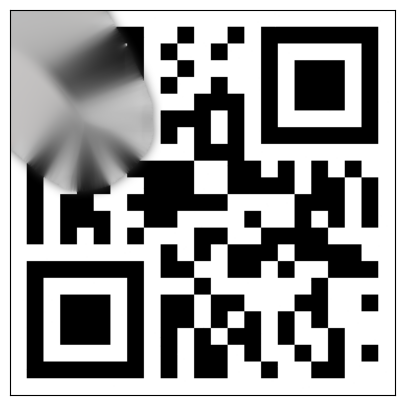

In [ ]:
image_path = "07-THE-MIGHTY-FINGER.png"
image = cv2.imread(image_path)

#height, width, _ = image.shape
#mask= np.zeros((height, width), np.uint8)

#mask[height//2:, :width//2] = 255

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

saturation_threshold = 0
_, thumb_mask = cv2.threshold(s, saturation_threshold, 255, cv2.THRESH_BINARY)

#kernel = np.ones((3, 3), np.uint8)
#thumb_mask = cv2.morphologyEx(thumb_mask, cv2.MORPH_CLOSE, kernel)

inpainted_image = cv2.inpaint(image, thumb_mask, 50, cv2.INPAINT_TELEA)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

#inpainted_image = image - inpainted_image
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(inpainted_image_rgb);
plt.show

## **Test Case 8**

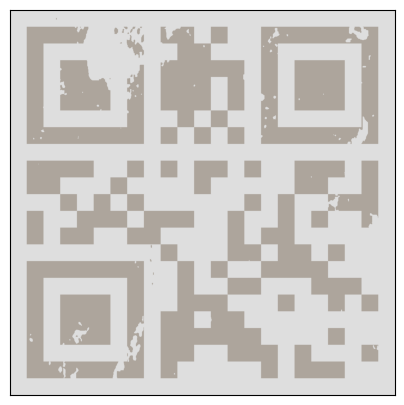

In [ ]:
img = cv2.imread("08-Compresso-Espresso.png")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
#dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
#opening = cv2.morphologyEx(_, cv2.MORPH_OPEN, kernel)


fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

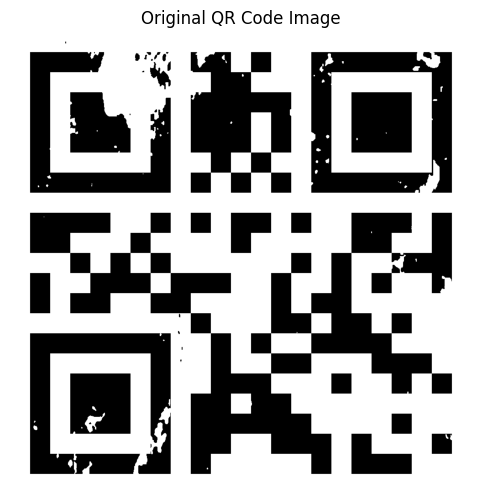

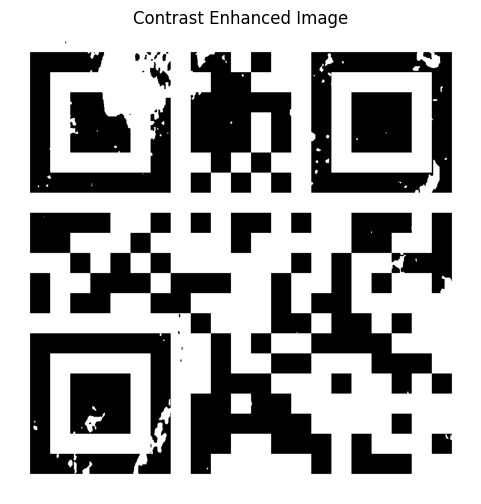

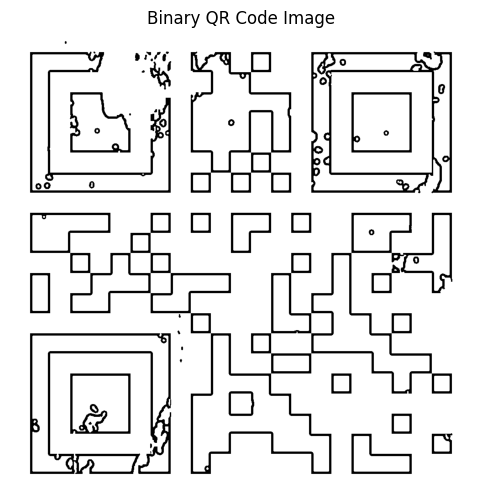

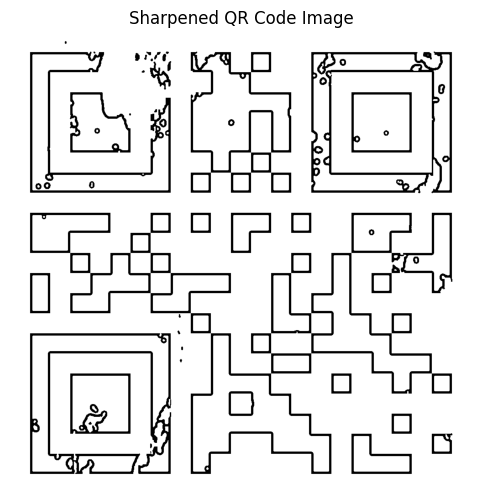

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the QR code image
image_path = "08-Compresso-Espresso.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original QR code image
plot_image(image, "Original QR Code Image")

# Enhance contrast using histogram equalization
equalized_image = cv2.equalizeHist(image)
plot_image(equalized_image, "Contrast Enhanced Image")

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Apply adaptive thresholding to create a binary image
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
plot_image(binary_image, "Binary QR Code Image")

# Apply a Laplacian filter to enhance edges
laplacian = cv2.Laplacian(binary_image, cv2.CV_64F)

# Convert Laplacian to the same type as binary_image before subtraction
laplacian_converted = np.clip(laplacian, 0, 255).astype(np.uint8)

# Subtract to enhance edges
sharpened_image = cv2.subtract(binary_image, laplacian_converted)
plot_image(sharpened_image, "Sharpened QR Code Image")


In [5]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(equalized_image):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(equalized_image[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = equalized_image.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(equalized_image)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(equalized_image)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = equalized_image.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

21 968 44 968


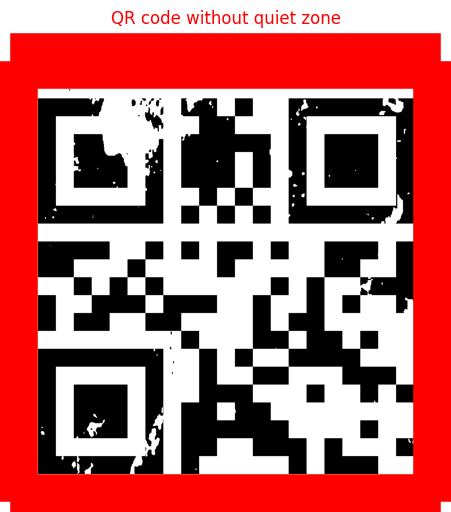

In [7]:
qr_no_quiet_zone = equalized_image[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 9**


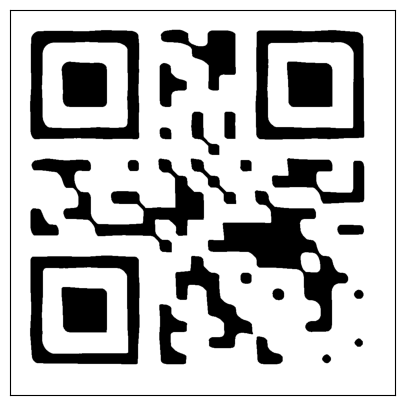

In [9]:
def sharpen_img(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    return cv2.filter2D(image, -1, kernel)

def add_quiet_zone(image, border_size=10):

    return cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=[255, 255, 255])

img = cv2.imread("09-My-phone-fell-while-taking-this-one-...-or-did-it.png", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img_thresh = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img_sharpened = sharpen_img(img_thresh)
edges = cv2.Canny(img_sharpened, 100, 200)
img_combined = cv2.bitwise_or(img_sharpened, edges)
img_final = add_quiet_zone(img_combined, 20)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_final, cmap='gray');

In [10]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img_final):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img_final[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img_final.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img_final)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img_final)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col =img_final.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

54 968 55 968


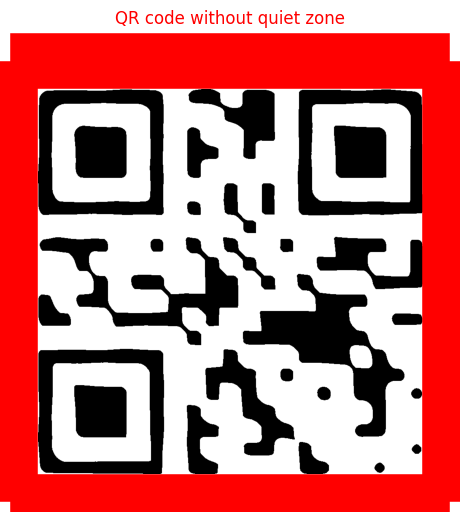

In [11]:
qr_no_quiet_zone = img_final[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test case: 10 and now it is similar to test case 7 the mighty Zinger**

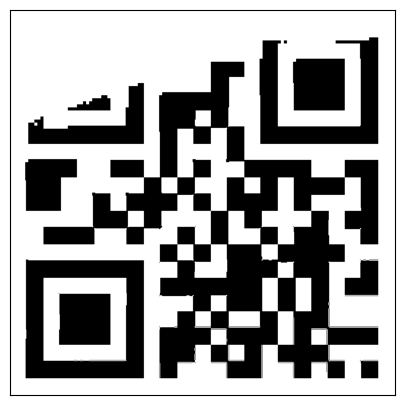

In [13]:
def fill_missing_area(img, mask, method=cv2.INPAINT_TELEA):
    return cv2.inpaint(img, mask, 3, method)

img = cv2.imread("10-Gone-With-The-Wind.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)

mask = np.zeros(img.shape, dtype=np.uint8)
mask[0:int(img.shape[0]), int(img.shape[1]):img.shape[1]] = 255

img = fill_missing_area(img, mask)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [14]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

72 968 40 968


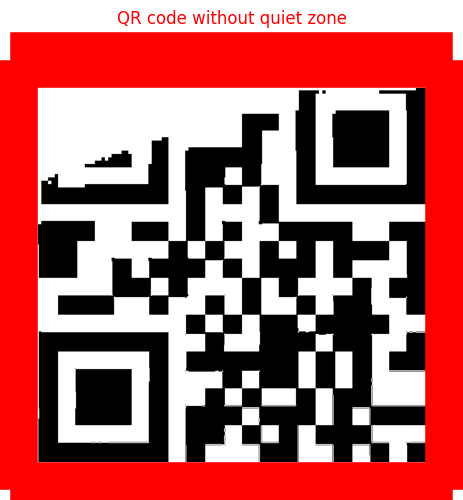

In [15]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 11**

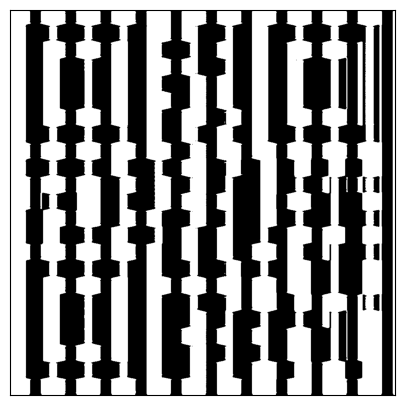

In [ ]:
img = cv2.imread("11-weewooweewooweewoo.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
#img = cv2.medianBlur(img,15)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 12**

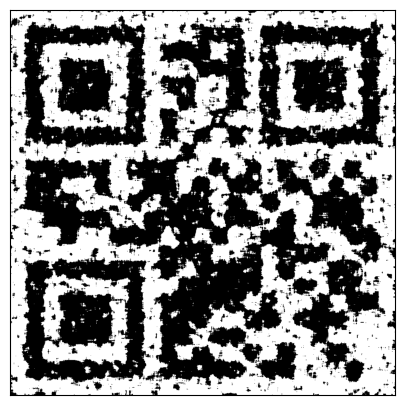

In [ ]:
img = cv2.imread("12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img,15)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

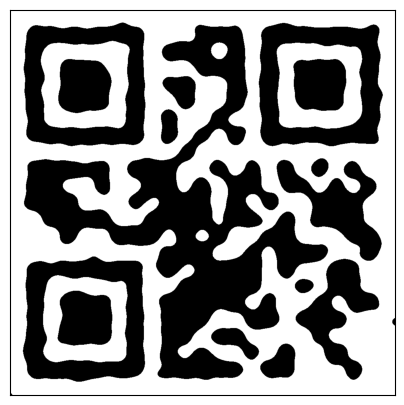

In [16]:
import cv2
import matplotlib.pyplot as plt

def apply_median_filter_recursive(img, iterations, kernel_size):
    if iterations == 0:
        return img
    else:
        filtered_img = cv2.medianBlur(img, kernel_size)
        return apply_median_filter_recursive(filtered_img, iterations-1, kernel_size)


img = cv2.imread("12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = apply_median_filter_recursive(img.copy(), 10, 15)  

fig = plt.figure(figsize=(5, 5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(img, cmap='gray')
plt.show()


In [17]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

33 1012 0 1012


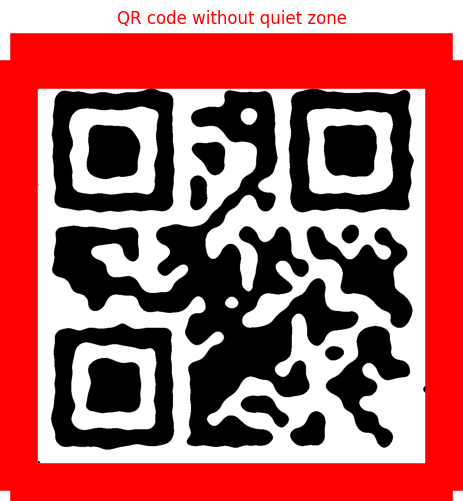

In [18]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 13**

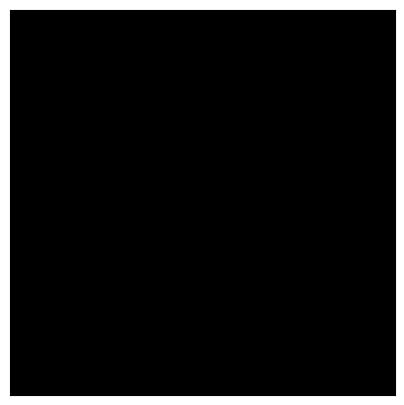

In [ ]:
img = cv2.imread("13-2el-noor-2ata3.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(img, cmap='gray')


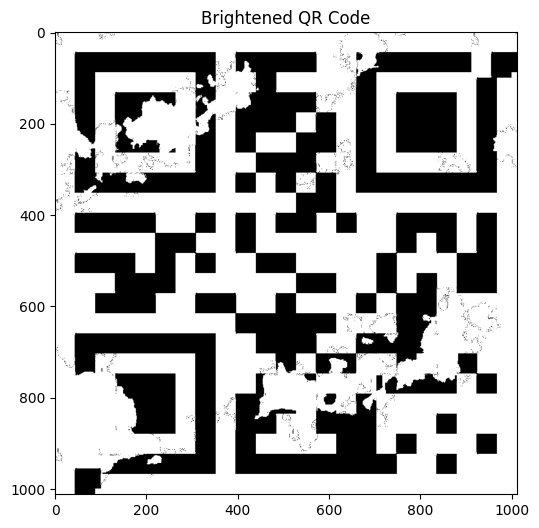

In [ ]:
def adjust_brightness_contrast(img, alpha=1.5, beta=50):
    new_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return new_img


reconstructed_path = "reconstructed.jpg"
reconstructed_img = cv2.imread(reconstructed_path, cv2.IMREAD_GRAYSCALE)
brightened_img = adjust_brightness_contrast(reconstructed_img)

plt.figure(figsize=(6, 6))
plt.title("Brightened QR Code")
plt.imshow(brightened_img, cmap='gray')
plt.show()

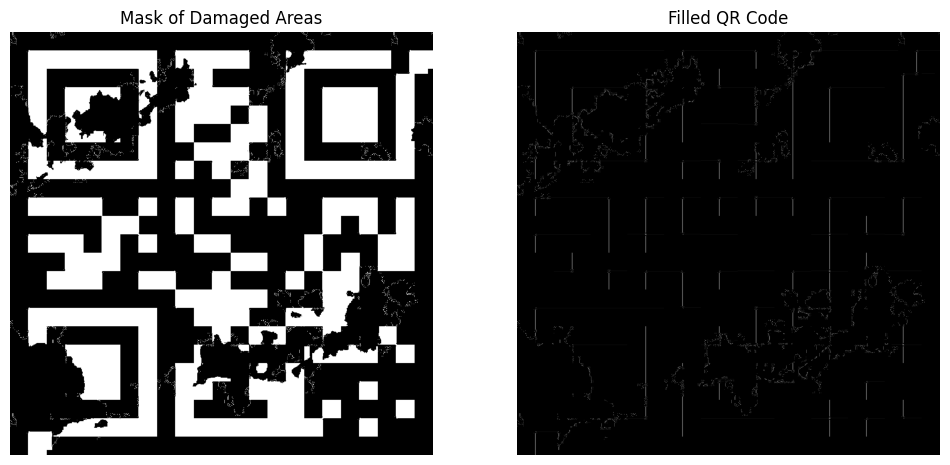

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fill_missing_parts(img_path):
    # Load the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise FileNotFoundError("Image not found. Please check the path and try again.")

    # Threshold the image to isolate lighter areas
    _, mask = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)

    # Use the mask to darken these areas in the original image
    filled_img = cv2.bitwise_and(img, img, mask=mask)

    return filled_img, mask

# Use this function
image_path = "reconstructed.jpg"  # Replace with your image path
filled_image, mask = fill_missing_parts(image_path)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask of Damaged Areas")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filled_image, cmap='gray')
plt.title("Filled QR Code")
plt.axis('off')
plt.show()

# Optionally, save the filled image
cv2.imwrite('filled_qr_code.png', filled_image)


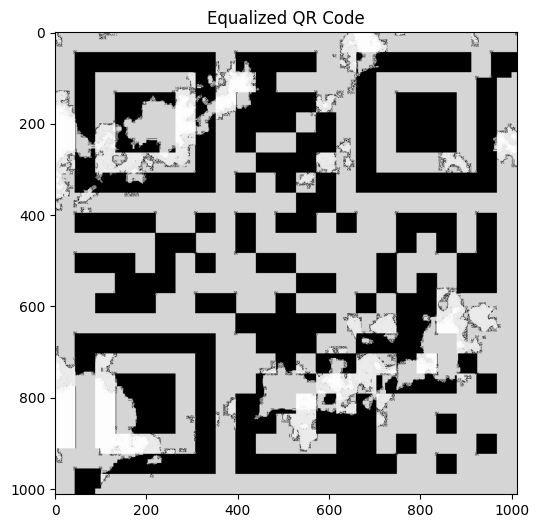

True

In [ ]:
def equalize_histogram(img):
    
    eq_img = cv2.equalizeHist(img)
    return eq_img

# Applying histogram equalization to the reconstructed image
equalized_img = equalize_histogram(reconstructed_img)

# Display the equalized image
plt.figure(figsize=(6, 6))
plt.title("Equalized QR Code")
plt.imshow(equalized_img, cmap='gray')
plt.show()
# Optionally save the processed image
cv2.imwrite('reconstructed.jpg', equalized_img)



do I apply it to the orih=ginal one , it is totally dark, or should I apply it to the reconstructed 

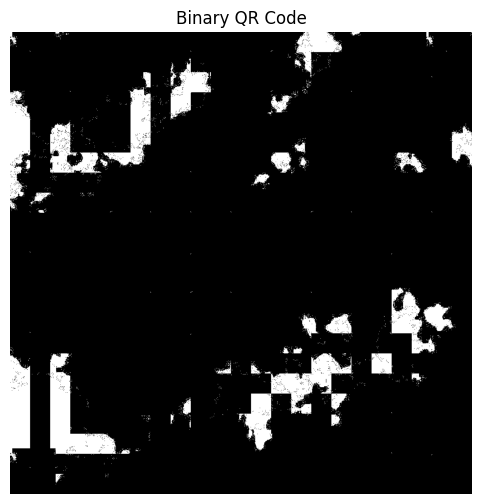

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_threshold(img_path, threshold_value):
   
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise FileNotFoundError("Image not found. Please check the path and try again.")

    # Pixels below the threshold become black (0), and those above become white (255)
    _, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

    return binary_img


threshold_value = 220  

# Apply the function
image_path = 'reconstructed.jpg' 
binary_image = apply_custom_threshold(image_path, threshold_value)

# Display the binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary QR Code")
plt.axis('off')
plt.show()

# Optionally, save the binary image
cv2.imwrite('image_to_be_added.jpg', binary_image)


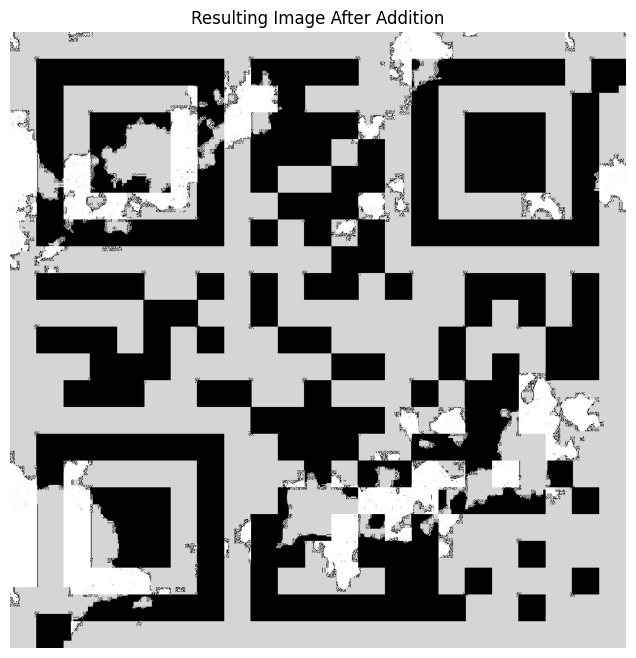

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1_path = "reconstructed.jpg"  
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)  


img2_path = "image_to_be_added.jpg"  
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)  

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both images not found. Please check the paths and try again.")

# Ensure both images are the same size
if img1.shape != img2.shape:
    raise ValueError("Images are not the same size. Please use images of the same dimensions.")

# Add the two images together
result_img = cv2.add(img1, img2)


plt.figure(figsize=(8, 8))
plt.imshow(result_img, cmap='gray') 
plt.title("Resulting Image After Addition")
plt.axis('off')
plt.show()

# Optionally, save the result
cv2.imwrite('added_image.png', result_img)


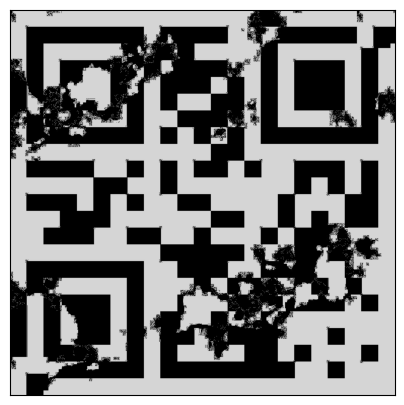

In [ ]:
def get_absolute_difference(img1, img2):

  # Ensure images have the same dimensions for element-wise difference
  if img1.shape != img2.shape:
    raise ValueError("Images must have the same dimensions")
  
  # Calculate absolute difference (works for grayscale and color images)
  diff = cv2.absdiff(img1, img2)
  return diff

# Example usage
img1 = cv2.imread("added_image.png")
img2 = cv2.imread("image_to_be_added.jpg")
difference_img = get_absolute_difference(img1, img2)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(difference_img, cmap='gray');

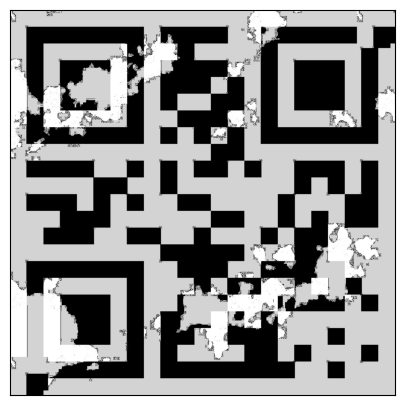

In [19]:
def add_images_weighted(img1, img2, weight1, weight2):
  
  if img1.shape != img2.shape:
    raise ValueError("Images must have the same dimensions")
  
  if not (0 <= weight1 <= 1 and 0 <= weight2 <= 1):
    raise ValueError("Weights must be between 0 and 1")
  
 
  blended_img = cv2.addWeighted(img1, weight1, img2, weight2, 0)
  return blended_img

# Example usage
img1 = cv2.imread("added_image.png")
img2 = cv2.imread("image_to_be_added.jpg") 
weight1 = 0.99  
weight2 = 0.2  

img = add_images_weighted(img1, img2, weight1, weight2)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');


In [20]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: zero-size array to reduction operation minimum which has no identity

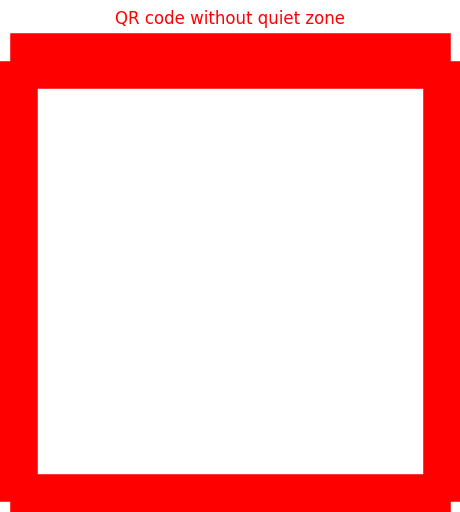

In [21]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 14**

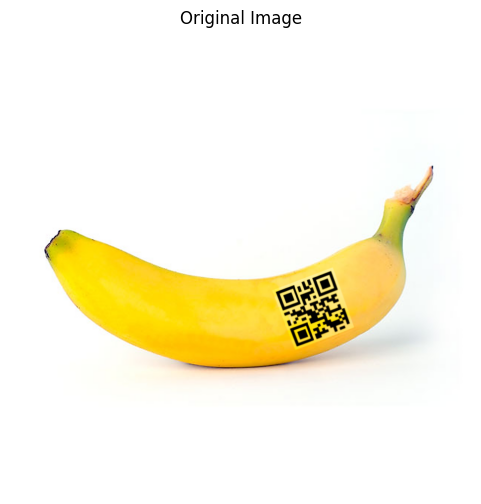

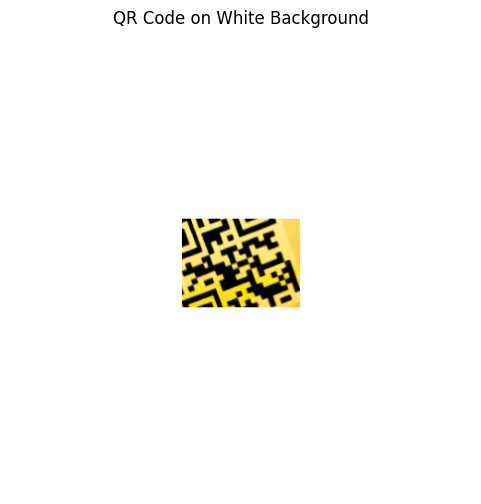

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2 or img.shape[2] == 1:  # Check if the image is grayscale
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '14-BANANAAA!!!.png'
image = cv2.imread(image_path)
plot_image(image, "Original Image")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


qr_contour = max(contours, key=cv2.contourArea)


x, y, w, h = cv2.boundingRect(qr_contour)


cropped_qr = image[y:y+h, x:x+w]

# Create a white background and place the QR code in the middle
background_size = (500, 500, 3)
background = np.ones(background_size, dtype=np.uint8) * 255
x_offset = (background_size[1] - w) // 2
y_offset = (background_size[0] - h) // 2
background[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_qr

plot_image(background, "QR Code on White Background")


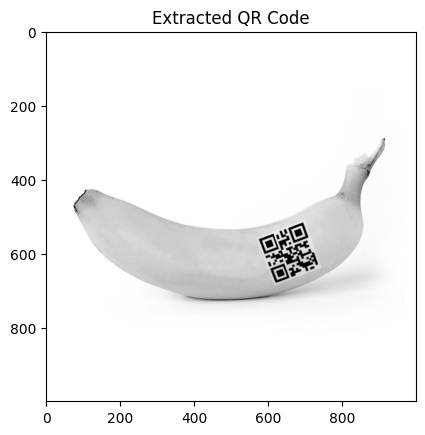

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_qr_code(file_path):
    # Load the image
    img = cv2.imread(file_path)
    if img is None:
        print("Error: Image not found or the path is incorrect.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply threshold to isolate the QR code
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the QR code is the largest square-like contour
    max_area = 0
    best_cnt = None
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > max_area:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
            if len(approx) == 4:  # Check if the contour is a rectangle
                max_area = area
                best_cnt = cnt

    if best_cnt is not None:
        # Get bounding box of the largest rectangle-like contour
        x, y, w, h = cv2.boundingRect(best_cnt)
        qr_code = gray[y:y+h, x:x+w]

        # Display the result using matplotlib
        plt.imshow(qr_code, cmap='gray')
        plt.title('Extracted QR Code')
        plt.show()

        return qr_code
    else:
        print("No QR code found.")
        return None

# Path to the uploaded image
file_path = '14-BANANAAA!!!.png'
extracted_qr_code = extract_qr_code(file_path)


## **Test Case 15**

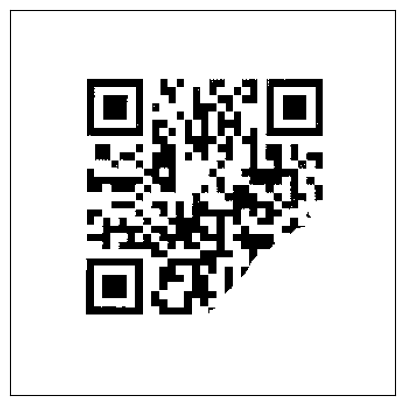

In [25]:
img = cv2.imread("15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [26]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

59 261 65 268


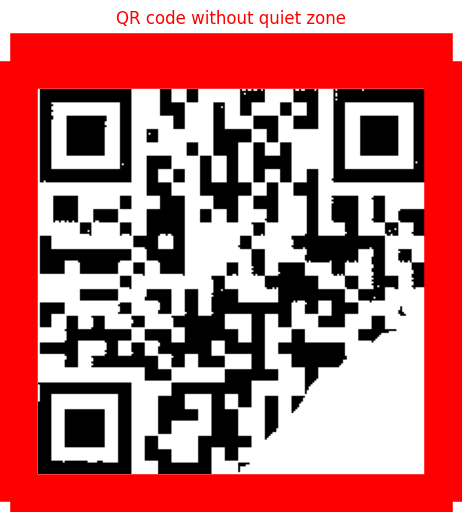

In [27]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

## **Test Case 16** 

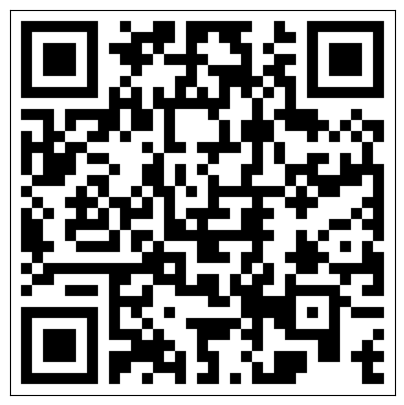

In [22]:
img = cv2.imread("16-V3-QR-Code...-can-you-do-it.png")
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

In [23]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: zero-size array to reduction operation minimum which has no identity

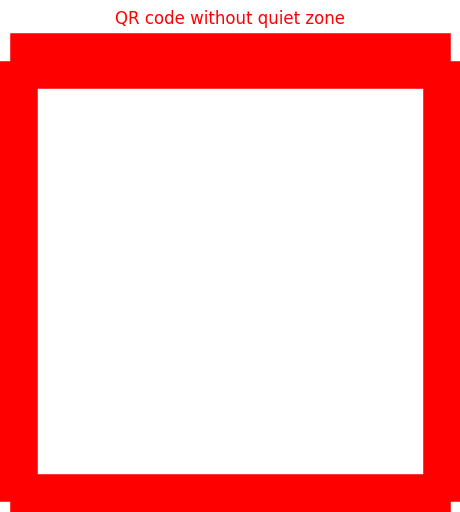

In [24]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

Phase 2 

Test Case 1 


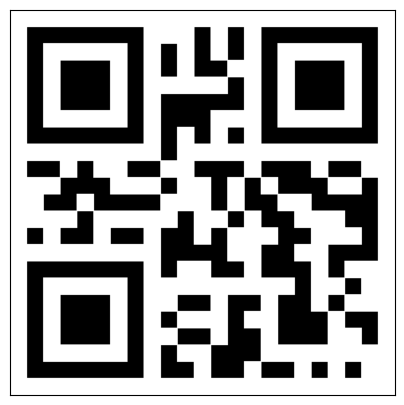

In [ ]:
img = cv2.imread('01-Getting-started.png', cv2.IMREAD_GRAYSCALE)


kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(dilated_img, cmap='gray');